# Calculating Median Pressures of Raman CO2 calibration analyses from ESI-TEC software log 
- This workbook shows how to extract and calculate median+standard deviation of pressure log data from the ESI-TEC software files corresponding to calibration analyses.
- This data is from Devitre et al. (2021), collected from acqusitions on a high pressure optical cell on the Cornell WITec Alpha300R. 

In [2]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import datetime

## Downloading DiadFit locally
- The easiest way to install diad fit is by removing the #. It will install from PyPI
- You only need to do this once on each computer, or run in order to grab an updated version. 

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.59'

## Extracting information from the ESI-TEC report files (.docx)
- ESI-Tec software exports a report in word document format, in which the absolute start time of the analysis,serial number of the sensor and other information are stored that we need to access

### First, we identify the report files

In [4]:
path=r"C:\Users\charl\Documents\Instruments and calibrations\UCB_4-10-23"
filetype_reports=['.docx']

report_files=pf.Psensor.get_files(path=path,filetype=filetype_reports)
display(report_files)

['Report_20230411_065351.docx']

### The, we strip the start time of the analysis and the serial number of the sensor from the file

In [5]:
j=0
rep=report_files[j]

start_time,sn_str=pf.Psensor.report_info(path=path,report=rep)

2023-04-10 11:09:18
Serial No. 0132212


## Extracting pressure data from the ESI-TEC pressure log
- ESI-TEC software exports the full pressure log to either excel or csv, which we extract here

### First, we identify the data files 
- These could be excel or csv, we can load either

In [6]:
filetype=['.csv','.xlsx']

pfiles=pf.Psensor.get_files(path=path,filetype=filetype)
display(pfiles)

['041023_37Cexperiment_ESITEC_out.xlsx', 'Experiment_37C_4-10-23.xlsx']

### Now pick a file to start with and read in the data
- Here we will obtain a Date and Time column based on the report start time and a Timestamp column (UNIX time)

In [9]:
i=0 # select filenumber in pfiles
print(pfiles[i])

pdata=pf.Psensor.read_pfiles(path=path,file=pfiles[i],start_time=start_time,sn_name=sn_str)
display(pdata.head())

041023_37Cexperiment_ESITEC_out.xlsx


,Time_sincestart,Pressure / MPa,Temperature / °C,Date and Time,unix_timestamp
0,00:00:00.000000,0.100957,23.078125,2023-04-10 11:09:18.000000,1.681125e+09
1,00:00:02.999194,0.101022,23.080078,2023-04-10 11:09:20.999194,1.681125e+09
2,00:00:06.000153,0.101470,23.091797,2023-04-10 11:09:24.000153,1.681125e+09
3,00:00:08.999278,0.100740,23.080078,2023-04-10 11:09:26.999278,1.681125e+09
4,00:00:11.999985,0.100636,23.082031,2023-04-10 11:09:29.999985,1.681125e+09


### We can plot the pressure data with Date and Time 

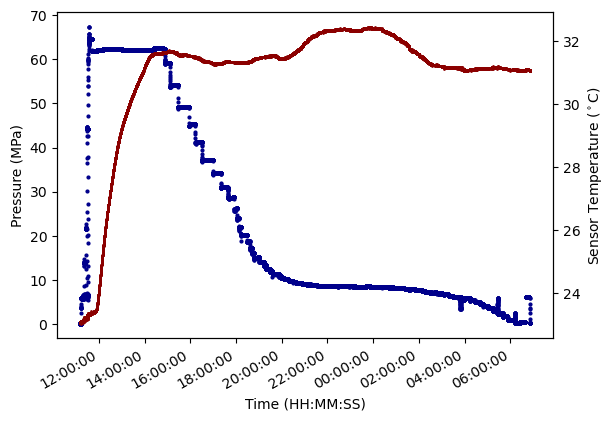

In [10]:
fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(pdata['Date and Time'],pdata['Temperature / °C'],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

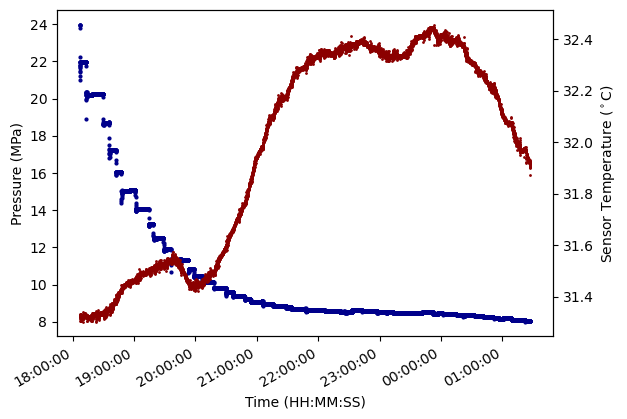

In [35]:
filter=(pdata['Pressure / MPa']<30)&(pdata['Pressure / MPa']>8)&(pdata['unix_timestamp']>1681150000)
pdata[filter]
fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'][filter],pdata['Pressure / MPa'][filter],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(pdata['Date and Time'][filter],pdata['Temperature / °C'][filter],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

In [12]:
cu_test=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\FDCA_calibfiles_CORNELL\112820_sensorout.xlsx", sheet_name='Sensor 0830903')
cu_test

,Time,Pressure / MPa,Temperature / °C
0,0.578044,0.101868,20.957031
1,0.578056,0.101962,20.955078
2,0.578067,0.101679,20.955078
3,0.578079,0.101444,20.958008
4,0.578090,0.101208,20.956055
...,...,...,...
42012,1.064281,0.084286,31.304688
42013,1.064293,0.084333,31.303711
42014,1.064304,0.083060,31.301758
42015,1.064316,0.083956,31.303711


Text(0, 0.5, 'Sensor Temperature ($^\\circ$C)')

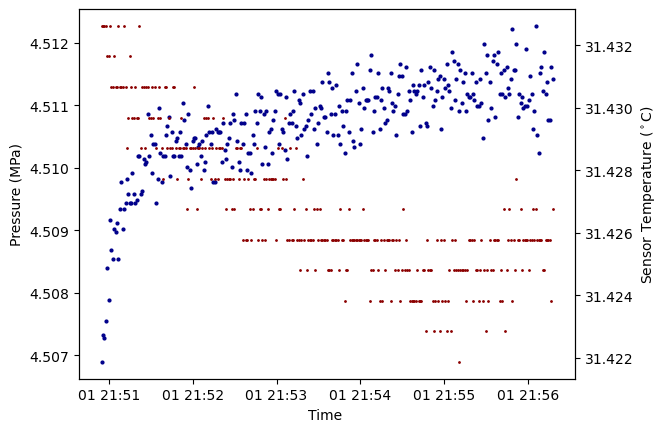

In [13]:
filter=(cu_test['Pressure / MPa']<5)&(cu_test['Pressure / MPa']>4)&(cu_test['Time']>0.91035)&(cu_test['Time']<0.9141)

fig, ax = plt.subplots()

ax.plot_date(cu_test['Time'][filter],cu_test['Pressure / MPa'][filter],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(cu_test['Time'][filter],cu_test['Temperature / °C'][filter],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time ")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")


## Now read in the calibration analysis data 
- This is output xlsx by "Stitch_Outputs_Together.pynb" using DiadFit. 
- You could also simply use a metadata table, but it must have the correct format as output by DiadFit metadata loop functions.

In [20]:
sdata_base = pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\OUTPUT\UCB_4-10-23_FI_fitting_w_sec_phases.xlsx")
sdata_base=sdata_base.drop(columns={'Unnamed: 0','Unnamed: 0.1'}) # drop unnamed column
display(sdata_base.head())

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,duration,24hr_time,sec since midnight,Spectral Center,filename,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio
0,104.329993,104.333997,104.325988,0.004004,103 FDCA-P25-1,104.586050,0.003912,0.003912,1282.436956,0.000000,...,"['0h', '1m', '42s']",8:08:46 PM\n,72526,1325.004,NaN,NaN,NaN,NaN,NaN,NaN
1,104.289394,104.297067,104.281721,0.007673,105 FDCA-P26-1,104.545273,0.010529,0.007639,1282.504156,0.006473,...,"['0h', '1m', '42s']",8:14:34 PM\n,72874,1325.004,NaN,NaN,NaN,NaN,NaN,NaN
2,103.335668,103.342071,103.329265,0.006403,187 FDCA-P59-1,103.586720,0.008811,0.006356,1284.643370,0.005293,...,"['0h', '1m', '41s']",2:19:19 AM\n,94759,1325.004,NaN,NaN,NaN,NaN,NaN,NaN
3,103.227680,103.233761,103.221599,0.006081,199 FDCA-P62-3,103.478532,0.008305,0.006030,1284.874481,0.005119,...,"['0h', '2m', '31s']",3:07:17 AM\n,97637,1325.004,NaN,NaN,NaN,NaN,NaN,NaN
4,103.200825,103.206551,103.195099,0.005726,201 FDCA-P63-1_CRR_DiadFit,103.451626,0.007969,0.005669,1284.949618,0.004427,...,"['0h', '2m', '16s']",3:14:08 AM\n,98048,1325.004,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate the datetime, unix timestamp and duration of each analysis
- Here we can specify a time offset between the raman computer and the pressure recording computer
- For this dataset, the raman computer was about ~4 minutes ahead of the pressure recording computer. If we specify df=sdata,raman_cpu_offset='ahead',offset_hms=[0,5,0] as arguments of the function, we will immediately at the end that the standard deviations of the pressure medians are much lower. If instead we said raman_cpu_offset='none', we can see at the end that the standard deviations are large for some samples.

In [21]:
sdata=pf.Psensor.add_datetime_and_duration_cols(df=sdata_base,raman_cpu_offset='ahead',offset_hms=[0,5,44])
sdata.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,filename,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,Date and Time,Date and Time - offset,unix_timestamp,duration_s
0,104.329993,104.333997,104.325988,0.004004,103 FDCA-P25-1,104.586050,0.003912,0.003912,1282.436956,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-10 20:08:46,2023-04-10 20:03:02,1.681157e+09,102.0
1,104.289394,104.297067,104.281721,0.007673,105 FDCA-P26-1,104.545273,0.010529,0.007639,1282.504156,0.006473,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-10 20:14:34,2023-04-10 20:08:50,1.681157e+09,102.0
2,103.335668,103.342071,103.329265,0.006403,187 FDCA-P59-1,103.586720,0.008811,0.006356,1284.643370,0.005293,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-11 02:19:19,2023-04-11 02:13:35,1.681179e+09,101.0
3,103.227680,103.233761,103.221599,0.006081,199 FDCA-P62-3,103.478532,0.008305,0.006030,1284.874481,0.005119,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-11 03:07:17,2023-04-11 03:01:33,1.681182e+09,151.0
4,103.200825,103.206551,103.195099,0.005726,201 FDCA-P63-1_CRR_DiadFit,103.451626,0.007969,0.005669,1284.949618,0.004427,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-11 03:14:08,2023-04-11 03:08:24,1.681183e+09,136.0


# Calculate the median pressure and median absolute deviation for each analysis
- This portion calculates the median pressures for each analysis based on the timestamps, and then merges the results back in with the analysis dataset
- Make sure that the time on each acquisition computer is the same or if you know the offset correct the time in one of the datasets

## Calculate median pressure and median absolute deviation for each analysis

In [22]:
# Calculate median pressure intra-analysis and 1 median absolute deviation
p_medians=pf.Psensor.get_p_medians(pdata=pdata,sdata=sdata)
display(p_medians.head())

,filename_x,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp
0,103 FDCA-P25-1,2023-04-10 20:03:00.841389824,2023-04-10 20:04:42.841389824,10.442348,0.001875,31.449219,0.003906
1,105 FDCA-P26-1,2023-04-10 20:08:48.828809984,2023-04-10 20:10:30.828809984,10.127584,0.001346,31.470703,0.003772
2,187 FDCA-P59-1,2023-04-11 02:13:35.155955200,2023-04-11 02:15:16.155955200,7.463151,0.001437,31.439453,0.005285
3,199 FDCA-P62-3,2023-04-11 03:01:31.909619200,2023-04-11 03:04:02.909619200,6.898164,0.004305,31.189453,0.003510
4,201 FDCA-P63-1_CRR_DiadFit,2023-04-11 03:08:22.871006976,2023-04-11 03:10:38.871006976,6.686178,0.000831,31.164062,0.003888


## Merge results into analysis dataset and plot
- Here, check that the standard deviations are small, plot can help ID issues like mismatching computer time
- In this dataset, for instance, the CPU time on the computer where the Raman analyses were made and the pressure recording laptop was slightly different (by 4 minutes), in a case like this, you'll want to adjust the time of the analyses, you can go back and do this then recalculate the medians.

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,Date and Time,Date and Time - offset,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp
43,105.279326,105.282756,105.275896,0.003430,003 FDCA-P1-1,105.542171,0.004575,0.003314,1280.792689,0.002797,...,2023-04-10 14:42:42,2023-04-10 14:36:58,1.681137e+09,102.0,2023-04-10 14:36:59.349467904,2023-04-10 14:38:41.349467904,62.489000,0.000706,31.603516,0.002679
44,105.280584,105.283991,105.277176,0.003407,005 FDCA-P1-2,105.543392,0.004556,0.003291,1280.792692,0.002752,...,2023-04-10 14:47:27,2023-04-10 14:41:43,1.681138e+09,102.0,2023-04-10 14:41:44.324145152,2023-04-10 14:43:26.324145152,62.473144,0.001202,31.611328,0.002685
45,105.290481,105.294046,105.286917,0.003565,007 FDCA-P1-3,105.553238,0.004772,0.003454,1280.781851,0.002908,...,2023-04-10 14:56:05,2023-04-10 14:50:21,1.681138e+09,102.0,2023-04-10 14:50:20.291985920,2023-04-10 14:52:02.291985920,62.452215,0.001161,31.642578,0.003603
46,105.255939,105.259495,105.252382,0.003556,009 FDCA-P2-1,105.518561,0.004774,0.003446,1280.826030,0.002876,...,2023-04-10 15:01:17,2023-04-10 14:55:33,1.681139e+09,102.0,2023-04-10 14:55:32.269398016,2023-04-10 14:57:14.269398016,59.265227,0.001133,31.650391,0.004547
47,105.255499,105.259088,105.251910,0.003589,011 FDCA-P2-2,105.518071,0.004790,0.003480,1280.826168,0.002959,...,2023-04-10 15:06:24,2023-04-10 15:00:40,1.681139e+09,102.0,2023-04-10 15:00:41.247139840,2023-04-10 15:02:23.247139840,59.250048,0.001667,31.667969,0.003524


(19457.567337962962, 19458.294988425925)

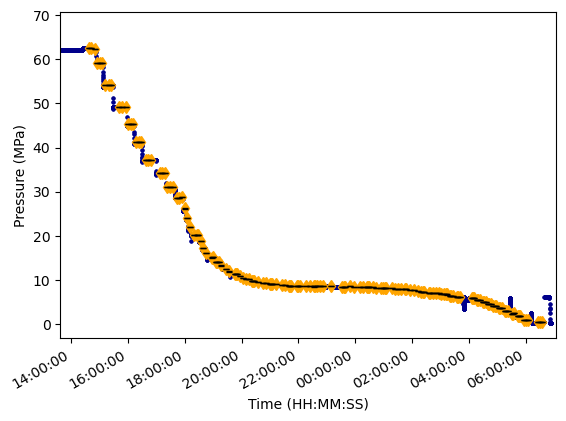

In [23]:
# Merge this into the OG spectal dataframe
merged_data=pd.merge(left=sdata,right=p_medians,how='outer',left_on='filename_x',right_on='filename_x')
# sort the dataframe by date and time
merged_data.sort_values(by='Date and Time',inplace=True)

display(merged_data.head())

show_temp=False # If you want to show the sensor temperature averages as well, change to True

fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=1)

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=1)
ax.errorbar(merged_data['Date and Time - offset'],merged_data['median_pressure'], yerr=merged_data['mad_pressure'], fmt='d',color='orange',mfc='orange', ecolor='black', capsize=2,barsabove=True,zorder=2)

if show_temp==True:
    
    ax2=ax.twinx()

    ax2.plot_date(pdata['Date and Time'],pdata['Temperature / °C'],'o',markersize=1,color='darkred',zorder=-1)
    ax2.errorbar(merged_data['Date and Time - offset'],merged_data['median_temp'], yerr=merged_data['mad_temp'], fmt='s',color='orange',mfc='orange', ecolor='black', capsize=2,barsabove=True,zorder=0)
    ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.xlim(min(merged_data['Date and Time - offset'])-datetime.timedelta(hours=1),max(merged_data['Date and Time - offset'])+datetime.timedelta(hours=0.5))


## Export merged data to excel or clipboard

In [24]:
merged_data['filename_nocrr'] = merged_data['filename_x'].str.split('_', n=1).str[0]
#Export the updated dataframe to excel
merged_data.to_excel(path+'/'+'merged_dataframe.xlsx')
#Export the updated dataframe to clipboard
merged_data.to_clipboard(excel=True)

## FERMI SPLIT vs P

In [25]:
#creates a column with a new column that splits the filename to sample name (FDCA-P1-1 becomes FDCA-P1)
df=merged_data.copy()
df['filename_split'] = df['filename_x'].str.split('-', n=2).str[:2].str.join('-')
df.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_split
43,105.279326,105.282756,105.275896,0.003430,003 FDCA-P1-1,105.542171,0.004575,0.003314,1280.792689,0.002797,...,1.681137e+09,102.0,2023-04-10 14:36:59.349467904,2023-04-10 14:38:41.349467904,62.489000,0.000706,31.603516,0.002679,003 FDCA-P1-1,003 FDCA-P1
44,105.280584,105.283991,105.277176,0.003407,005 FDCA-P1-2,105.543392,0.004556,0.003291,1280.792692,0.002752,...,1.681138e+09,102.0,2023-04-10 14:41:44.324145152,2023-04-10 14:43:26.324145152,62.473144,0.001202,31.611328,0.002685,005 FDCA-P1-2,005 FDCA-P1
45,105.290481,105.294046,105.286917,0.003565,007 FDCA-P1-3,105.553238,0.004772,0.003454,1280.781851,0.002908,...,1.681138e+09,102.0,2023-04-10 14:50:20.291985920,2023-04-10 14:52:02.291985920,62.452215,0.001161,31.642578,0.003603,007 FDCA-P1-3,007 FDCA-P1
46,105.255939,105.259495,105.252382,0.003556,009 FDCA-P2-1,105.518561,0.004774,0.003446,1280.826030,0.002876,...,1.681139e+09,102.0,2023-04-10 14:55:32.269398016,2023-04-10 14:57:14.269398016,59.265227,0.001133,31.650391,0.004547,009 FDCA-P2-1,009 FDCA-P2
47,105.255499,105.259088,105.251910,0.003589,011 FDCA-P2-2,105.518071,0.004790,0.003480,1280.826168,0.002959,...,1.681139e+09,102.0,2023-04-10 15:00:41.247139840,2023-04-10 15:02:23.247139840,59.250048,0.001667,31.667969,0.003524,011 FDCA-P2-2,011 FDCA-P2


<ErrorbarContainer object of 3 artists>

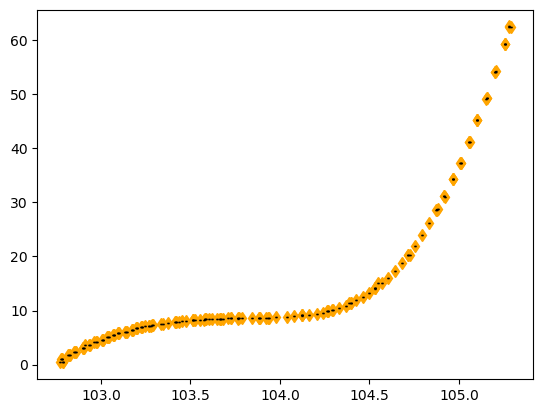

In [26]:
plt.errorbar(y=merged_data['median_pressure'],x=merged_data['Corrected_Splitting'], yerr=merged_data['mad_pressure'], fmt='d',color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)
